## Introduction:

Predict the outcomes in a data set using either Random Forest or k-NN.

Tip

Cut down the data set down to size. Though not strictly necessary, this is strongly recommended to make it easier. Select 7 variables with strong predictive value, based on your knowledge of the topic (domain knowledge) and/or correlation. Remember to subset the data with df[[‘column 1’, ‘column2’, ‘column3’]]. Don't spend too much time on this step. It's supposed to make the assignment easier, not harder.

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of 

fundamental frequencies divided by the frequency range

label: male or female

In [9]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #We need this to split the data

In [15]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Describe which dataset and variables you selected and why:
I selected the voice dataset. I am going to predict the variable label (male or female).

The columns I choose are: SD, Median, Q25, IQR, Mode, Minfun, Meandom.
I chose this because if I take a look at the dataframe I can see some differences between male and female frequencies. To check this I will make a scatterplot of multiple columns to see what is correlated.

### Data cleaning:

Describe any data cleaning steps:

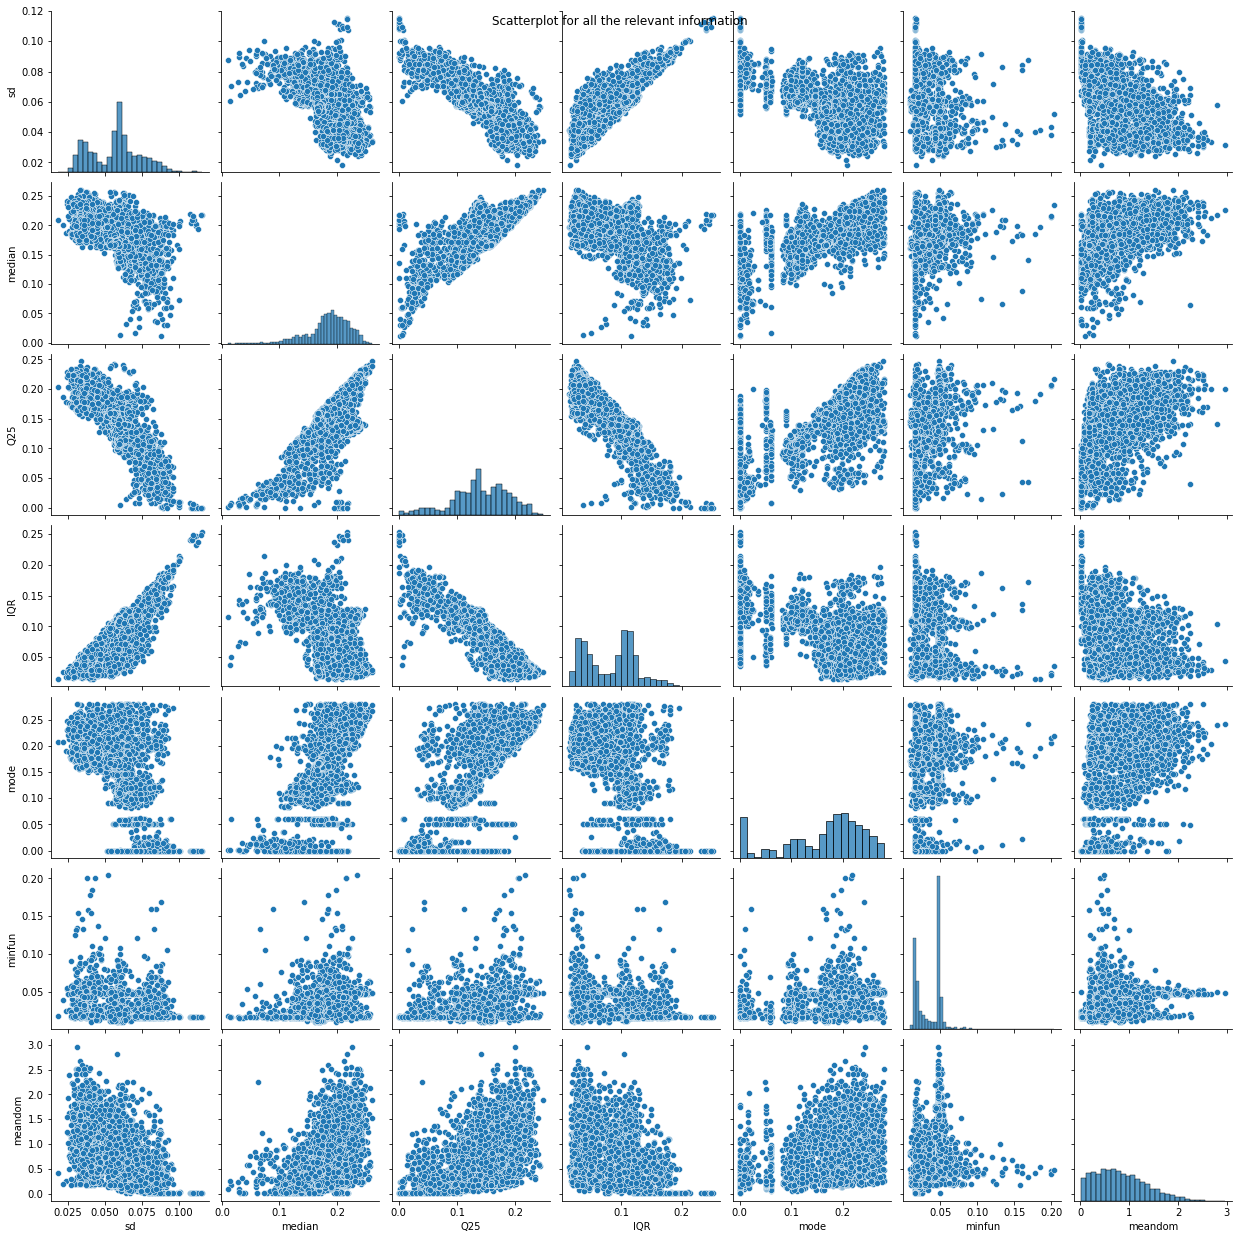

In [17]:
df_subset = df[['sd', 'median', 'Q25', 'IQR','mode', 'minfun', 'meandom']]
sns.pairplot(df_subset)
plt.suptitle("Scatterplot for all the relevant information")
plt.show()

If I look at the scatterplot above I see a few that have linear regression visible. I see that sd/IQR, Q25/median, IQR/Q25 and Q25/sd do have some correlation with each other. 

In [27]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['sd', 'median', 'Q25', 'IQR','mode', 'minfun', 'meandom']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['sd'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=1)
#split the data, store it into different variables

In [28]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

ValueError: Unknown label type: 'continuous'

### Exploratory data analysis:

Present relevant graphs and tables with respect to your problem:

### Predictive model

Choose one of the following: k-nearest neighbor or random forest
Explain briefly in your own words how the algorithm works
Split the data set into a training and test set
Train the model

### Evaluation

Calculate the accuracy, precision and recall. Describe and interpret the results in a Markdown cell.

### Conclusion